# Feature scaling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## What is Feature Scaling?

**Feature scaling is a method used to normalize the range of independent variables or features of data.**

## When to scale your data?

- **`Gradient Descent Based Algorithms`**

<img width="500" src="images/scaling_fig01.webp">

In [8]:
import timeit
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Load the Sklearn diabetes data set
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Create scaled data set
raw = diabetes_X[:, None, 2]
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

def train_raw_data():
    LinearRegression().fit(raw, diabetes_y)

def train_scaled_data():
    LinearRegression().fit(scaled, diabetes_y)

# Use the timeit method to measure the execution of training method
raw_time = timeit.timeit(train_raw_data, number=1000)
scaled_time = timeit.timeit(train_scaled_data, number=1000)

# Print the time taken to train the model with raw data and scaled data
print(f"Raw data: {raw_time}s")
print(f"Scaled data: {scaled_time}s")


Raw data: 1.0653980000060983s
Scaled data: 1.3312203999958s


In [9]:
diabetes_X.shape, diabetes_y.shape

((442, 10), (442,))

- **`Distance-Based Algorithms (very sensitive to the relative magnitudes of the different features)`**
    - Distance-based algorithms like KNN, K-means, and SVM are most affected by the range of features. 

- **`For feature engineering using PCA`**

- **`Linear regression`**

- **`L1 or L2 regularization`**

## When scaling your data is not necessary?

- **`Tree-based algorithms`**

## Different types of features scaling

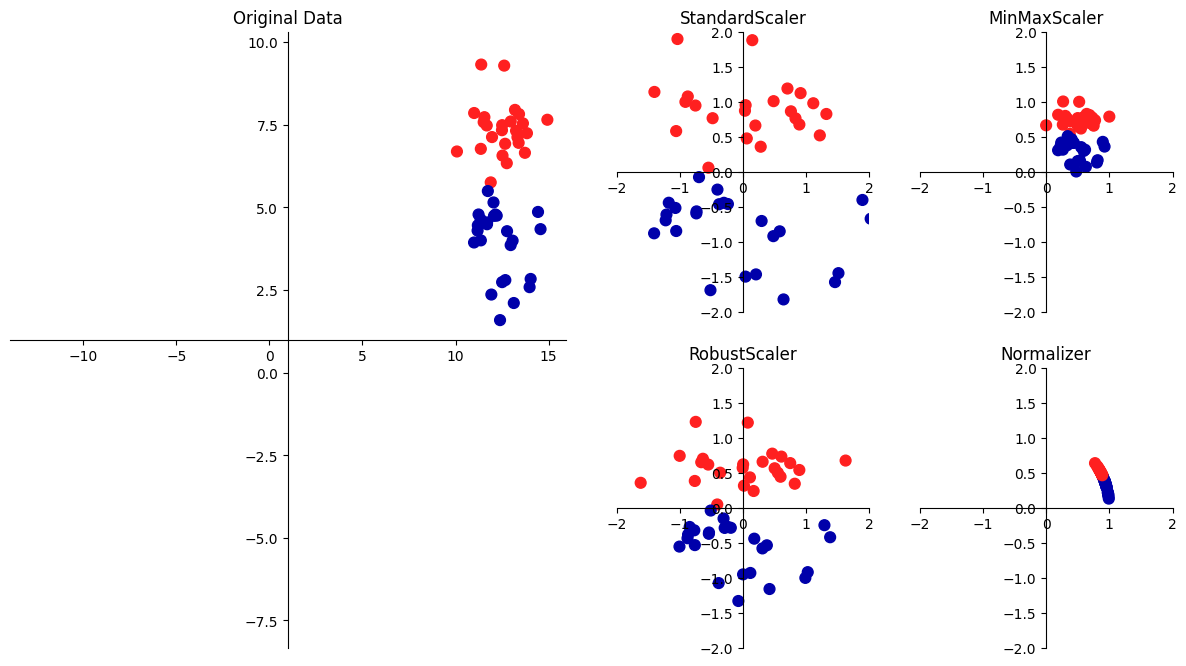

In [10]:
from helpers import plot_scaling

plot_scaling.plot_scaling()

- Use `MinMaxScaler` as your default
- Use `RobustScaler` if you have outliers and can handle a larger range
- Use `StandardScaler` if you need normalized features
- Use `Normalizer` sparingly - it normalizes rows, not columns

In [12]:
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
df

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


### Normalization

- Also known as **min-max scaling** or **min-max normalization**, it is the simplest method and consists of **rescaling the range of features to scale the range in [0, 1]**. 


The general formula for normalization is given as:

<img width="150" src="images/formula_img01.png">

> We can also do a normalization over different intervals, e.g. choosing to have the variable laying in any [a, b] interval, a and b being real numbers.

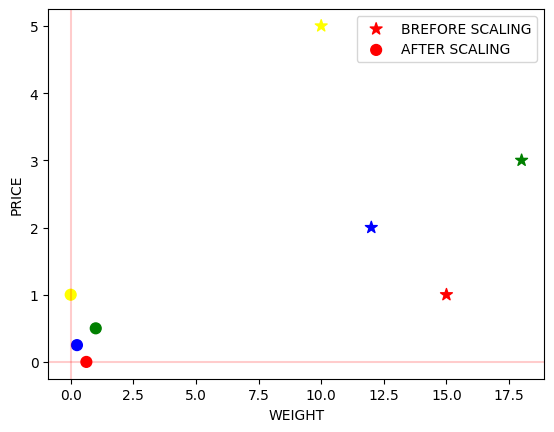

In [13]:
# default range 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

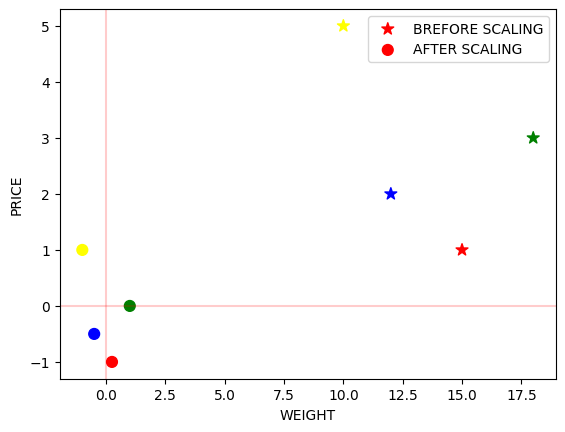

In [14]:
# [-1,1] range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

df1 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

### Standardization

- **Z-score normalization**, also known as **Z-score standardization** or **mean-variance scaling**.
- Feature standardization makes the values of each feature in the data **have zero mean and a standard deviation of one (unit variance)**. 


The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

<img width="150" src="images/formula_img02.png">

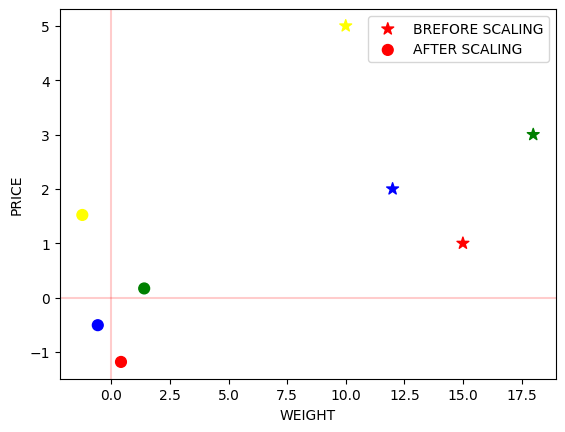

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

Practical example:

In [17]:
# Train a Perceptron Model without Feature Scaling
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# features are sepal length and petal length
X = iris.data[:, [0, 2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

prcptrn = Perceptron(eta0=0.1, random_state=1)
prcptrn.fit(X_train, y_train)

y_predict = prcptrn.predict(X_test)
print(f"Misclassified examples {(y_test != y_predict).sum()}")
print(f"Accuracy Score {accuracy_score(y_test, y_predict):.3f}")

Misclassified examples 19
Accuracy Score 0.578


In [19]:
# Train a Perceptron Model with Feature Scaling
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# features are sepal length and petal length
X = iris.data[:, [0, 2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

prcptrn = Perceptron(eta0=0.1, random_state=1)
prcptrn.fit(X_train_scaled, y_train)

y_predict = prcptrn.predict(X_test_scaled)
print(f"Misclassified examples {(y_test != y_predict).sum()}")
print(f"Accuracy Score {accuracy_score(y_test, y_predict):.3f}")

Misclassified examples 1
Accuracy Score 0.978


### Robust Scalar

- Robust scaling is one of the **best scaling techniques when we have outliers present in our dataset**. It scales the data accordingly to the interquartile range (IQR = 75 Quartile — 25 Quartile).

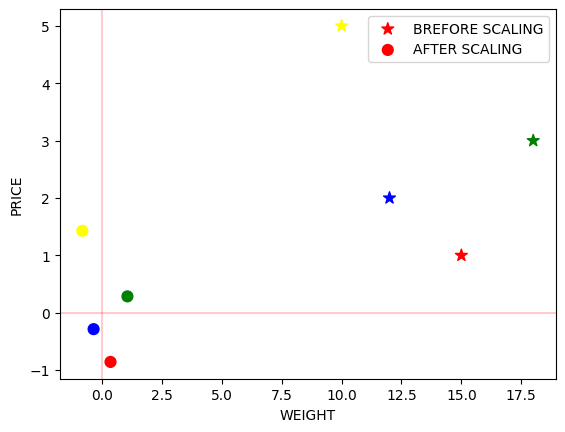

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

df3.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

Effect of scaling using Standard Scaler and Robust Scaler:

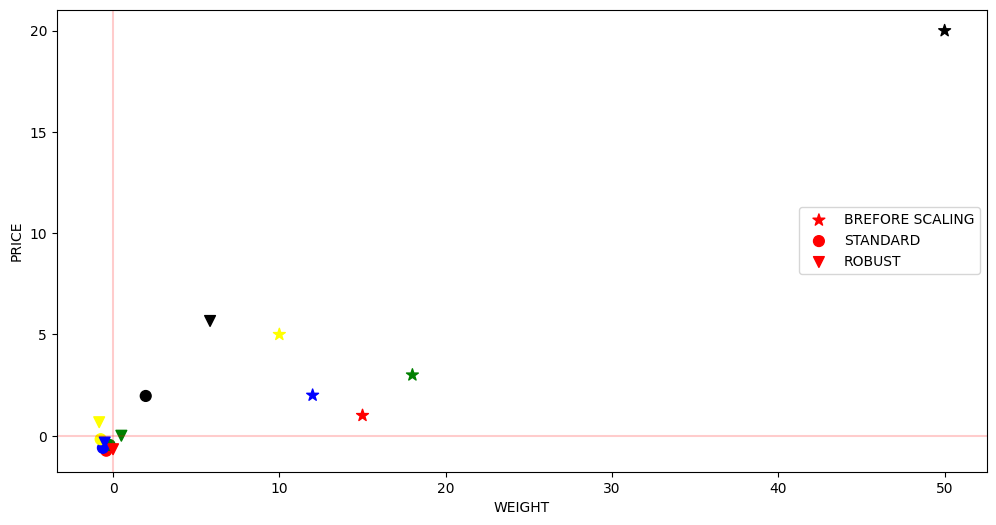

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])


scaler = StandardScaler()

df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow','black'], 
                     marker = '*',s=80, label='BREFORE SCALING')

df21.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))

scaler = RobustScaler()

df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);
plt.show()

### Scaling to unit length

**Normalizer works on the rows, not the columns.**

- It scales each data point such that the **feature vector has a Euclidean length of 1**.

This usually means dividing each component by the Euclidean length of the vector:

<img width="350" src="images/formula_img03.png">

## Applying Scaling Transformations

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [28]:
# print(cancer["DESCR"])
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
# transform data
X_train_scaled = scaler.transform(X_train)

In [38]:
# print dataset properties before and after scaling
print(f"transformed shape: {X_train_scaled.shape}")
print(f"per-feature minimum before scaling:\n {X_train.min(axis=0)}")
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scaled.max(axis=0)}")

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [40]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


**MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set**. 

## Scaling Training and Test Data the Same Way

**It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.**

In [41]:
from sklearn.datasets import make_blobs

In [42]:
#make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

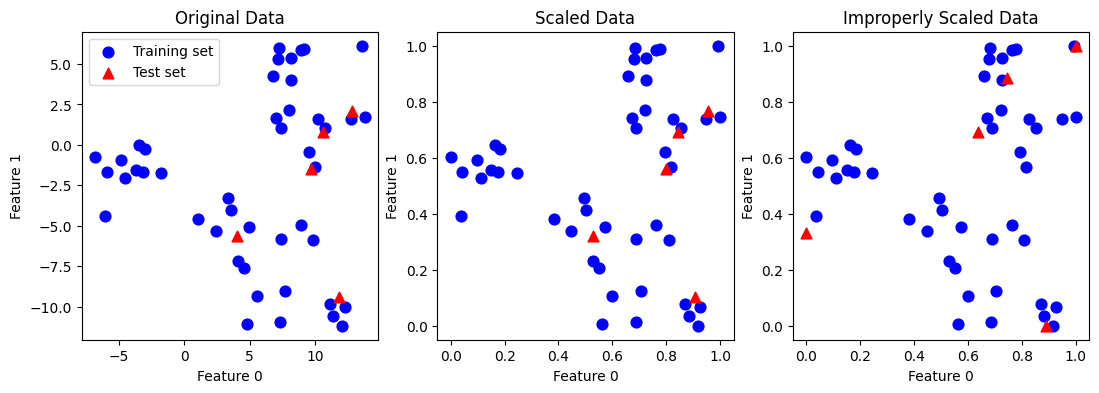

In [43]:
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c="blue", label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c="red", label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c="blue", label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c="red", label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c="blue", label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c="red", label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

## The Effect of Preprocessing on Supervised Learning

In [49]:
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print(f"Test set accuracy: {svm.score(X_test, y_test):.2f}")

Test set accuracy: 0.94


In [51]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.97


In [52]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test set accuracy: 0.96


In [53]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test set accuracy: 0.95


## Tips

<img src="images/scaling_fig02.png">